In [40]:
import pandas as pd

In [41]:
data_new = pd.read_excel('2021.xlsx')

In [42]:
# Python built-in method for normalizing and removing accents
import unicodedata

def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return "".join([c for c in nfkd_form if not unicodedata.combining(c)])

# Apply the function to remove accents from all string-type columns
for column in data_new.columns:
    if data_new[column].dtype == object:  # apply only to object type columns
        data_new[column] = data_new[column].apply(lambda x: remove_accents(x) if isinstance(x, str) else x)

data_new.head()


,RÉCOLTES 2021 - Palais des congrès,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Date (M/J/A),Culture,Variete,Nombre,Poids (kg),Section,Commentaires,NaN,NaN
2,2021-07-20 00:00:00,Aubergine,Hansel,27,5.774,G,NaN,NaN,NaN
3,2021-07-21 00:00:00,Aubergine,Hansel,27,3.326,G,NaN,NaN,NaN
4,2021-07-21 00:00:00,Aubergine,Beatrice,42,13.302,G,NaN,NaN,NaN


In [44]:
# Renaming the columns for clarity
columns_renamed = {
    "RÉCOLTES 2021 - Palais des congrès": "Date",
    "Unnamed: 1": "Culture",
    "Unnamed: 2": "Variety",
    "Unnamed: 3": "Nombre",
    "Unnamed: 4": "Poids (kg)",
    "Unnamed: 5": "Section",
    "Unnamed: 6": "Commentaires"
}

# Applying the new column names
data_new_clean = data_new.rename(columns=columns_renamed)

# Removing any rows that are entirely NA
data_new_clean = data_new_clean.dropna(how='all')

# Converting 'Date' to datetime and 'Nombre' and 'Poids (kg)' to numeric
data_new_clean['Date'] = pd.to_datetime(data_new_clean['Date'], errors='coerce')
data_new_clean['Nombre'] = pd.to_numeric(data_new_clean['Nombre'], errors='coerce')
data_new_clean['Poids (kg)'] = pd.to_numeric(data_new_clean['Poids (kg)'], errors='coerce')

# Handling missing values by filling with appropriate methods
data_new_clean['Nombre'].fillna(data_new_clean['Nombre'].median(), inplace=True)

# Dropping rows with missing values in "Poids (kg)"
data_new_clean = data_new_clean.dropna(subset=['Poids (kg)'])

data_new_clean['Culture'].fillna(method='ffill', inplace=True)

# Replacing missing values in "Variété" with corresponding values from "Culture"
data_new_clean['Variety'].fillna(data_new_clean['Culture'], inplace=True)

data_new_clean['Section'].fillna(method='ffill', inplace=True)

# Display the cleaned data head and describe to check
data_new_clean_head = data_new_clean.head()
data_new_clean_description = data_new_clean.describe()

/var/folders/6t/hm7b1zyn7klgzfp2k59y6xgh0000gn/T/ipykernel_2600/90399821.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_new_clean['Date'] = pd.to_datetime(data_new_clean['Date'], errors='coerce')
/var/folders/6t/hm7b1zyn7klgzfp2k59y6xgh0000gn/T/ipykernel_2600/90399821.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_new_clean['Nombre'].fillna(data_new_clean['Nombre'].me

In [45]:
data_new_clean_head

,Date,Culture,Variety,Nombre,Poids (kg),Section,Commentaires,Unnamed: 7,Unnamed: 8
2,2021-07-20,Aubergine,Hansel,27.0,5.774,G,NaN,NaN,NaN
3,2021-07-21,Aubergine,Hansel,27.0,3.326,G,NaN,NaN,NaN
4,2021-07-21,Aubergine,Beatrice,42.0,13.302,G,NaN,NaN,NaN
5,2021-07-26,Aubergine,Beatrice,24.0,16.700,G,NaN,NaN,NaN
6,2021-07-26,Aubergine,Hansel,24.0,5.430,G,NaN,NaN,NaN


In [46]:
data_new_clean_description

,Date,Nombre,Poids (kg),Unnamed: 7,Unnamed: 8
count,899,907.000000,907.000000,0.0,3.000000
mean,2021-09-01 21:51:51.457174528,24.632856,16.168109,NaN,89.955333
min,2021-05-27 00:00:00,3.000000,0.008000,NaN,5.440000
25%,2021-08-13 00:00:00,24.000000,0.605000,NaN,49.592000
50%,2021-09-03 00:00:00,24.000000,1.616000,NaN,93.744000
75%,2021-09-22 00:00:00,24.000000,3.797000,NaN,132.213000
max,2021-10-27 00:00:00,279.000000,3014.711000,NaN,170.682000
std,NaN,10.585859,193.023041,NaN,82.686124


In [47]:
data_new_clean_dropped = data_new_clean.drop(columns=['Commentaires', 'Unnamed: 7', 'Unnamed: 8'])
data_new_clean_dropped_head = data_new_clean_dropped.head()

In [48]:
data_new_clean_dropped_head

,Date,Culture,Variety,Nombre,Poids (kg),Section
2,2021-07-20,Aubergine,Hansel,27.0,5.774,G
3,2021-07-21,Aubergine,Hansel,27.0,3.326,G
4,2021-07-21,Aubergine,Beatrice,42.0,13.302,G
5,2021-07-26,Aubergine,Beatrice,24.0,16.700,G
6,2021-07-26,Aubergine,Hansel,24.0,5.430,G


In [49]:
data_new_clean_dropped.to_csv('/Users/user/Desktop/community project/2021/2021.csv', index=False)

In [50]:
data=pd.read_csv('/Users/user/Desktop/community project/2021/2021.csv')

In [51]:
data.head()

,Date,Culture,Variety,Nombre,Poids (kg),Section
0,2021-07-20,Aubergine,Hansel,27.0,5.774,G
1,2021-07-21,Aubergine,Hansel,27.0,3.326,G
2,2021-07-21,Aubergine,Beatrice,42.0,13.302,G
3,2021-07-26,Aubergine,Beatrice,24.0,16.700,G
4,2021-07-26,Aubergine,Hansel,24.0,5.430,G


In [62]:
# Redefine data without 'Nombre' column and calculate descriptive statistics again
data_cleaned = data.drop(columns=['Nombre'])

# Calculate descriptive statistics for 'Poids (kg)' for each 'Variété' and each 'Culture'
variety_stats = data_cleaned.groupby('Variety')['Poids (kg)'].describe()
culture_stats = data_cleaned.groupby('Culture')['Poids (kg)'].describe()

variety_stats, culture_stats


(                   count      mean       std    min      25%     50%     75%  \
 Variety                                                                        
 ?                    4.0  2.090250  2.364259  0.300  0.64125  1.2755  2.7245   
 Antigua             15.0  1.831600  1.565584  0.262  0.75400  1.2640  2.2400   
 Aura                12.0  1.570667  1.472288  0.074  0.73150  1.2580  1.8435   
 Aura jaune          20.0  1.174900  0.984873  0.138  0.47400  0.9130  1.6795   
 Aura jaune ?         1.0  0.260000       NaN  0.260  0.26000  0.2600  0.2600   
 ...                  ...       ...       ...    ...      ...     ...     ...   
 Trinidad Scorpion    8.0  0.774750  0.511997  0.078  0.28950  0.9310  1.2230   
 Twingo              16.0  1.724625  1.759470  0.246  0.92150  1.0530  1.6170   
 Vert                49.0  4.305633  5.595807  0.258  0.76200  2.1960  5.8340   
 West Coast           1.0  0.650000       NaN  0.650  0.65000  0.6500  0.6500   
 West coast           1.0  0

In [52]:
# Assuming culture_stats contains the descriptive statistics for 'Poids (kg)' grouped by 'Culture'
specific_culture_stats = culture_stats.loc['Carotte']

print("Descriptive Statistics for Carotte Culture:")
print(specific_culture_stats)


Descriptive Statistics for Carotte Culture:
count    5.000000
mean     5.176400
std      1.621663
min      3.534000
25%      3.564000
50%      5.200000
75%      6.770000
max      6.814000
Name: Carotte, dtype: float64


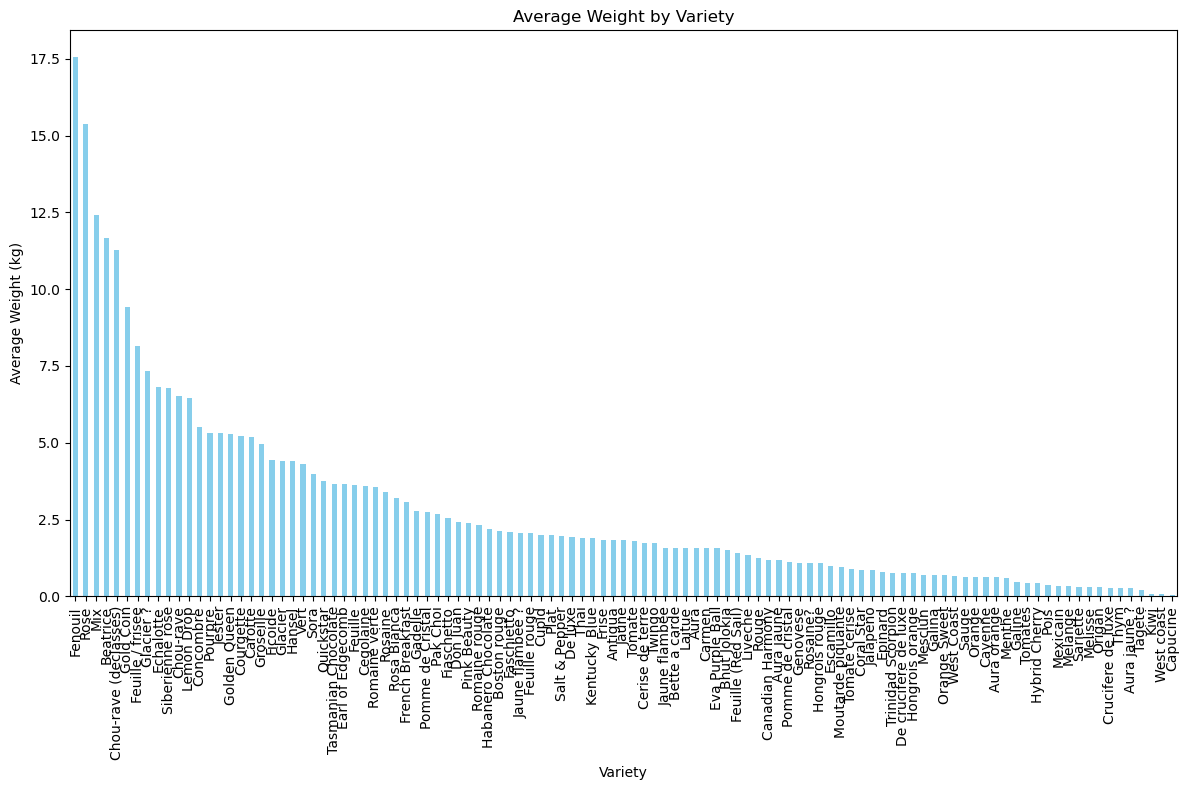

In [54]:
import matplotlib.pyplot as plt
# Calculate average weight for each 'Variété'
average_weight_by_variety = data_cleaned.groupby('Variety')['Poids (kg)'].mean().sort_values(ascending=False)

# Plotting the average weights by variety
plt.figure(figsize=(12, 8))
average_weight_by_variety.plot(kind='bar', color='skyblue')
plt.title('Average Weight by Variety')
plt.xlabel('Variety')
plt.ylabel('Average Weight (kg)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


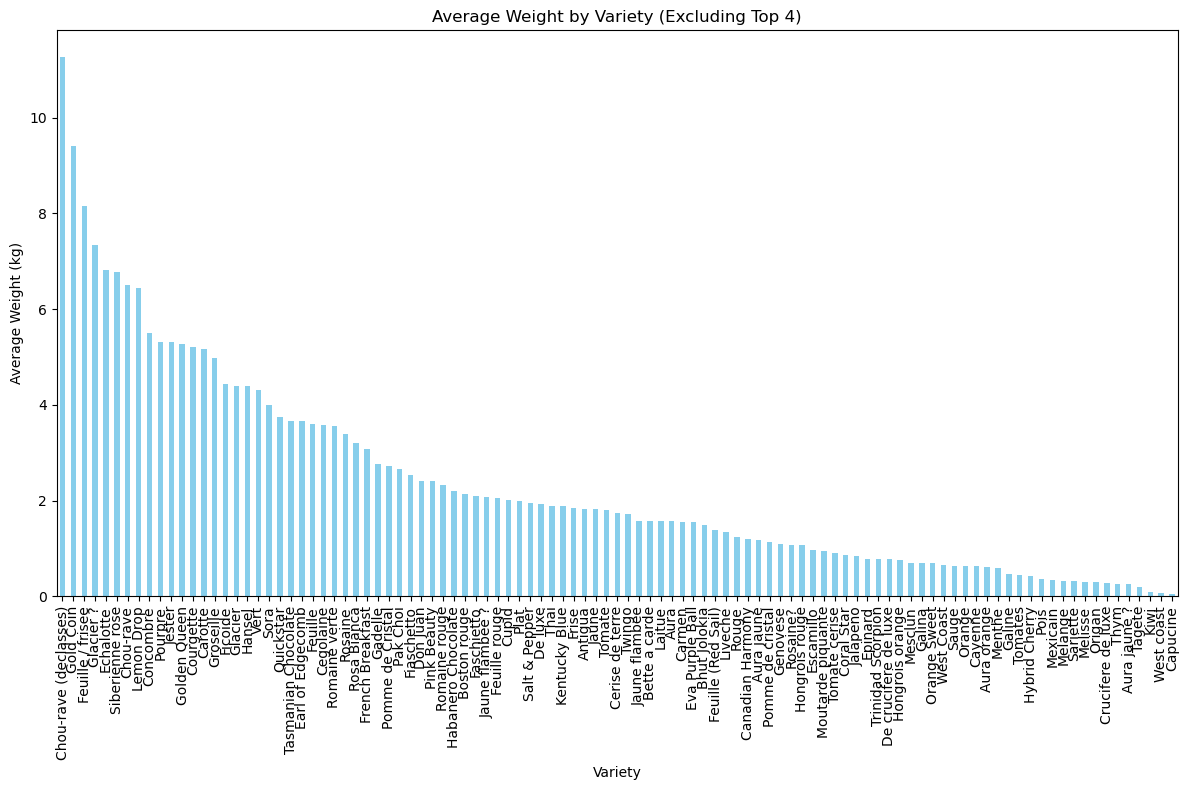

In [55]:

# Remove the first three bars (the highest three averages) and replot
average_weight_by_variety_trimmed = average_weight_by_variety.iloc[4:]

# Replotting with the trimmed data
plt.figure(figsize=(12, 8))
average_weight_by_variety_trimmed.plot(kind='bar', color='skyblue')
plt.title('Average Weight by Variety (Excluding Top 4)')
plt.xlabel('Variety')
plt.ylabel('Average Weight (kg)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [56]:
# Group data by both 'Culture' and 'Variété' and calculate total weight for each variety within each culture
total_weight_by_variety_culture = data_cleaned.groupby(['Culture', 'Variety'])['Poids (kg)'].sum().unstack(fill_value=0)

# Display the total weight for each variety within each culture
total_weight_by_variety_culture


Variety,Antigua,Aura,Aura jaune,Aura jaune ?,Aura orange,Beatrice,Bette a carde,Bhut Jolokia,Boston rouge,Canadian Harmony,...,Thai,Thym,Tomate,Tomate cerise,Tomates,Trinidad Scorpion,Twingo,Vert,West Coast,West coast
Culture,,,,,,,,,,,,,,,,,,,,,
Aubergine,27.474,0.000,0.000,0.00,0.00,315.025,0.000,0.000,0.000,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000
Basilic,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.00,...,5.686,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000
Bette a carde,0.000,0.000,0.000,0.00,0.00,0.000,6.316,0.000,0.000,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000
Capucine,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000
Carotte,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000
Celeri,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000
Cerise de terre,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000
Chou-rave,0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,66.526,0.00,0.000
Chou-rave (declasses),0.000,0.000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000


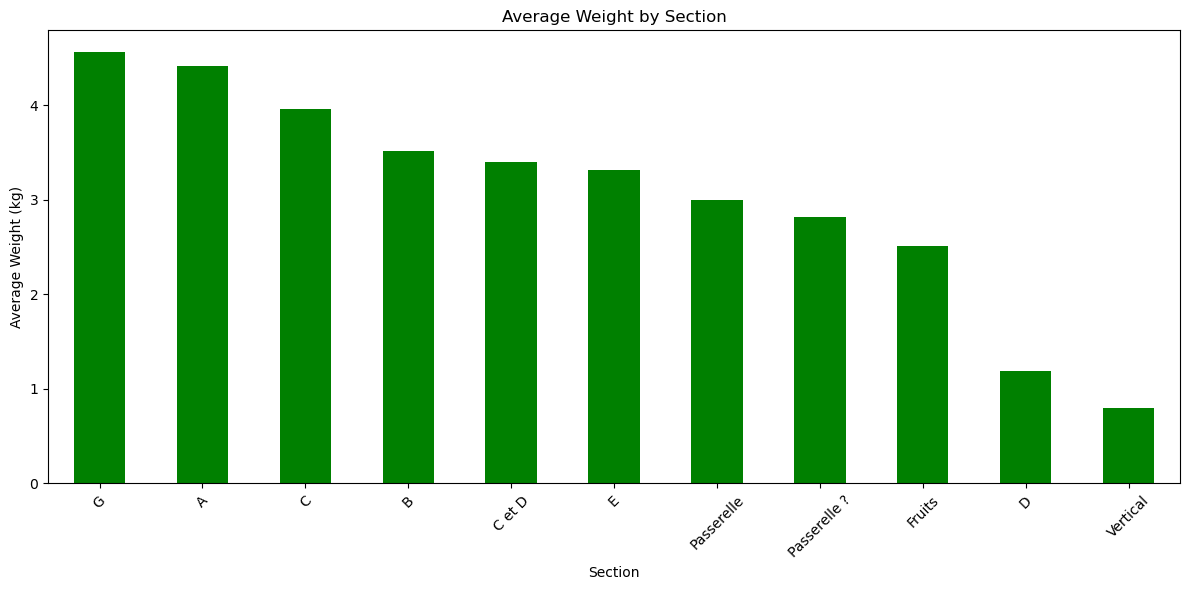

In [57]:
# Calculate average weight for each 'Section'
average_weight_by_section = data_cleaned.groupby('Section')['Poids (kg)'].mean().sort_values(ascending=False)

# Plotting the average weights by section
plt.figure(figsize=(12, 6))
average_weight_by_section.plot(kind='bar', color='green')
plt.title('Average Weight by Section')
plt.xlabel('Section')
plt.ylabel('Average Weight (kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [59]:
# Filter data for Section 'G' and get unique varieties in that section
varieties_in_section_g = data_cleaned[data_cleaned['Section'] == 'G']['Variety'].unique()
varieties_in_section_g


array(['Hansel', 'Beatrice', 'Antigua', 'Rosa Bianca', 'Rose', 'Vert',
       'Pourpre', 'Chou-rave', 'Quickstar', 'Chou-rave (declasses)',
       'Pomme de Cristal', 'Jaune', 'Fenouil', 'Ficoide', 'Kentucky Blue',
       'Feuille', 'Cupid', 'Aura', 'Aura jaune', 'Tomate',
       'Eva Purple Ball', 'Jaune flambee', 'Tomate cerise', 'Galine',
       'Hybrid Cherry', 'Orange', 'Galina'], dtype=object)

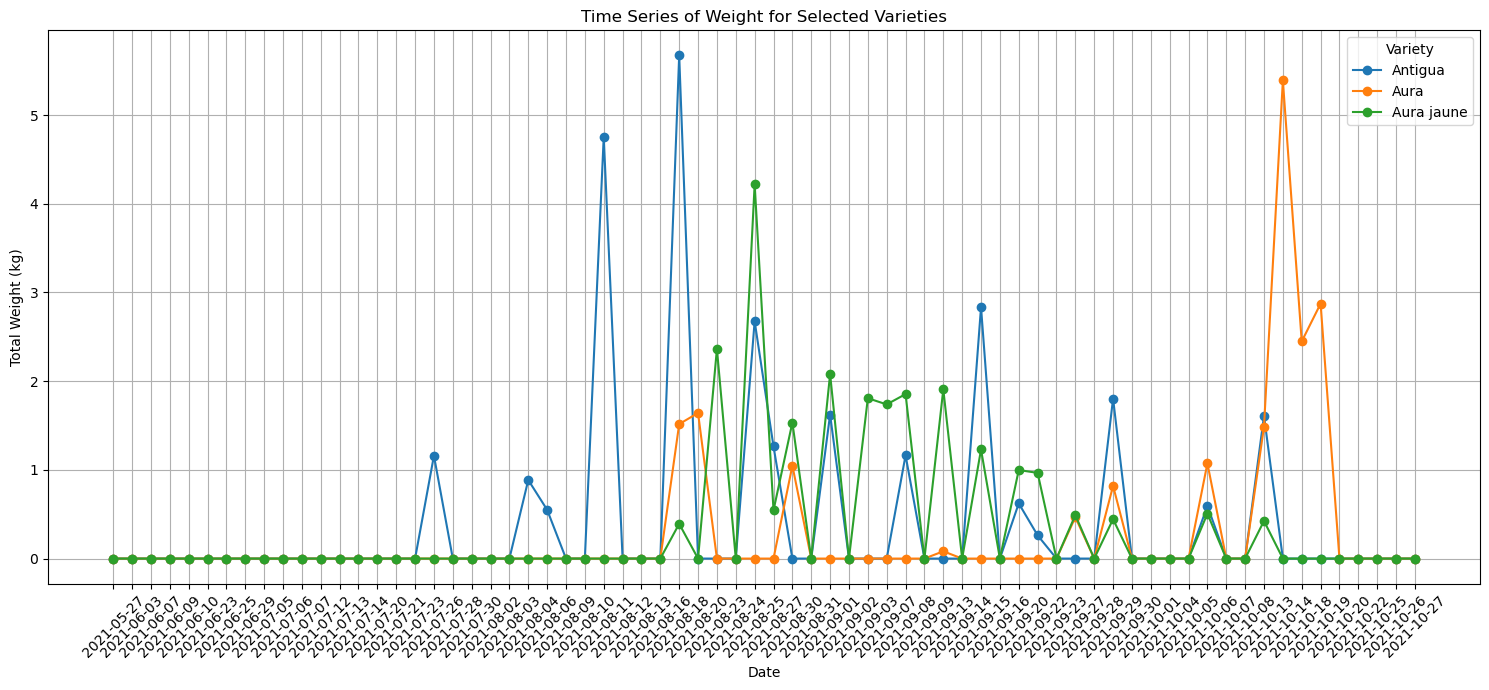

In [60]:
# Group data by 'Date' and 'Variété' and sum weights, then reset index for easier plotting
time_series_data = data_cleaned.groupby(['Date', 'Variety'])['Poids (kg)'].sum().reset_index()

# Pivot data for time series plotting where each variety has its own column
time_series_pivot = time_series_data.pivot(index='Date', columns='Variety', values='Poids (kg)').fillna(0)

# Select a few varieties to plot as an example
example_varieties = time_series_pivot.columns[:3]  # Selecting the first three varieties as an example

# Plotting time series for selected varieties
plt.figure(figsize=(15, 7))
for variety in example_varieties:
    plt.plot(time_series_pivot.index, time_series_pivot[variety], label=variety, marker='o')

plt.title('Time Series of Weight for Selected Varieties')
plt.xlabel('Date')
plt.ylabel('Total Weight (kg)')
plt.legend(title='Variety')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

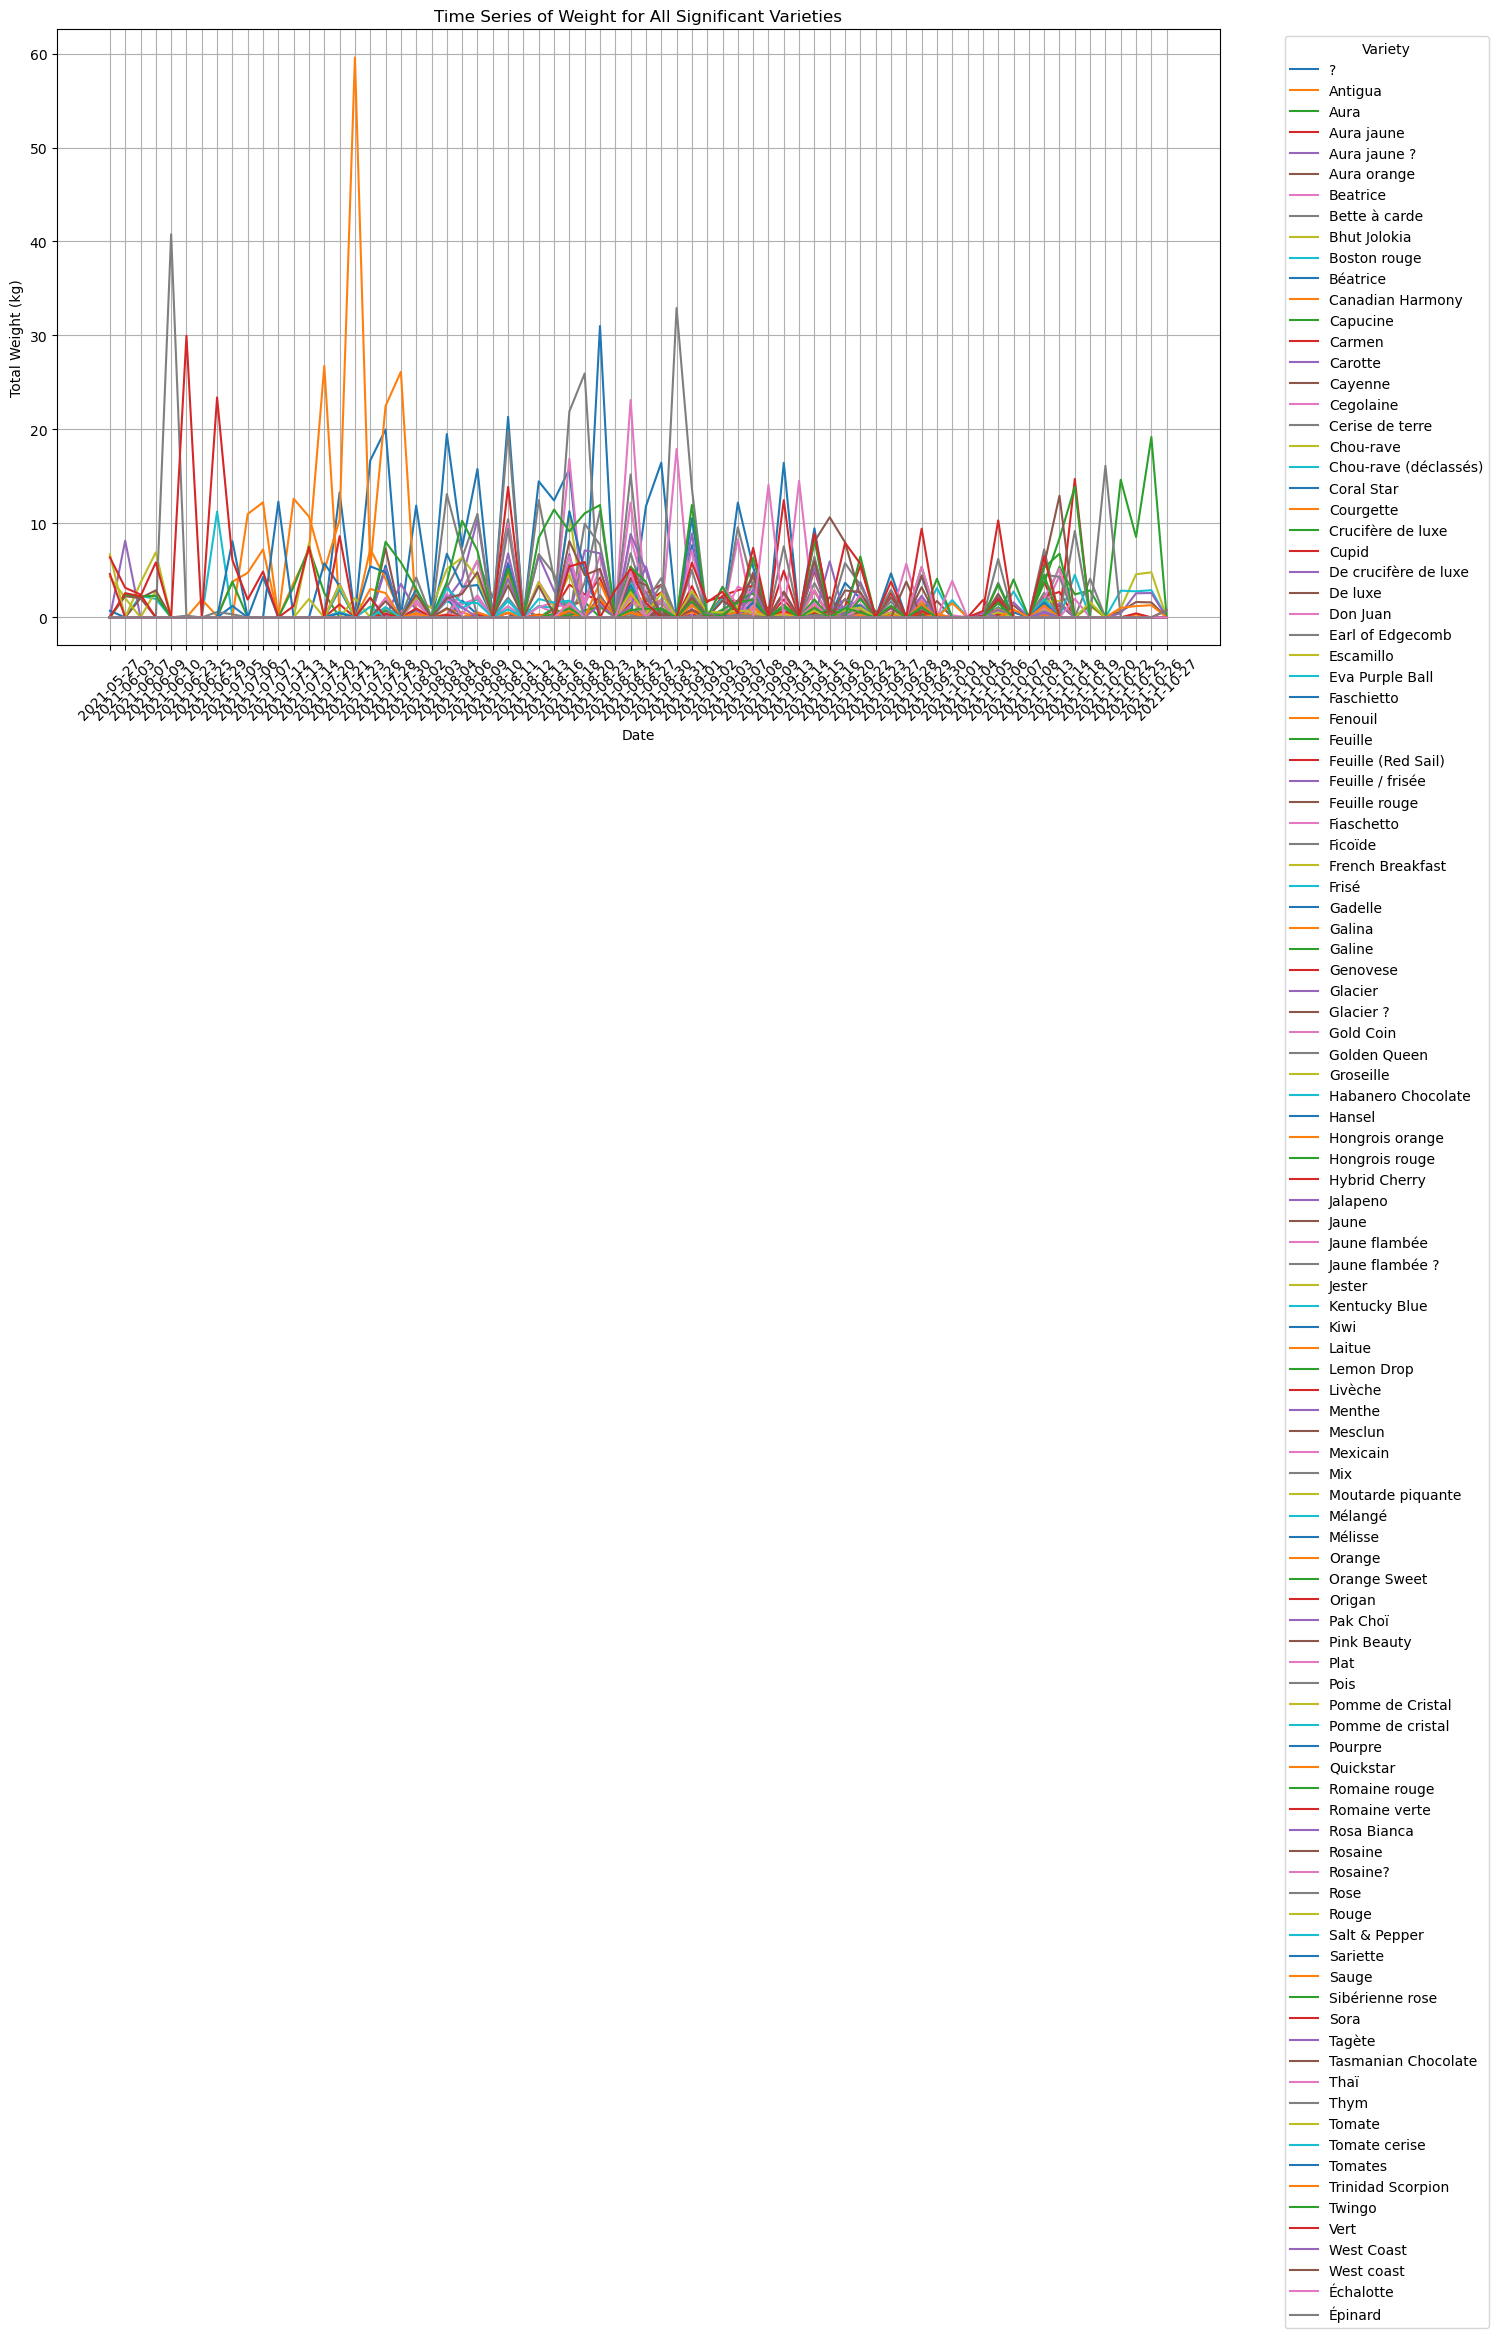

/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

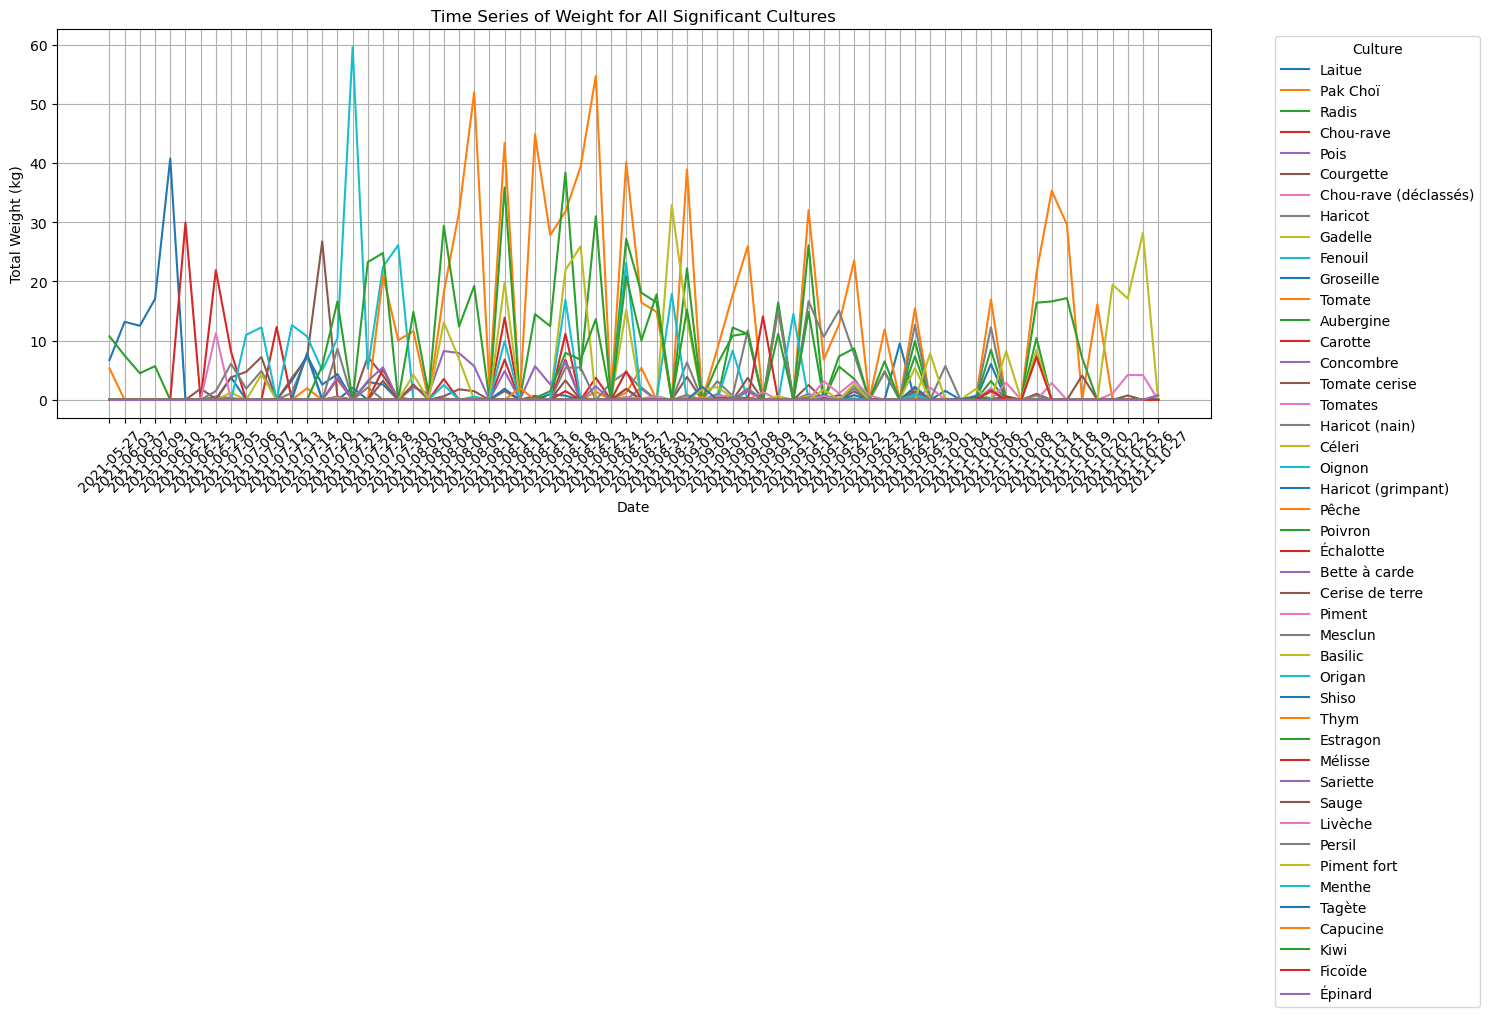

In [19]:
import seaborn as sns
# Creating a line graph for the weight trends of all varieties over time for a broader analysis
plt.figure(figsize=(15, 8))
for variety in time_series_pivot.columns:
    if time_series_pivot[variety].sum() > 0:  # Plot only varieties with significant total weight
        sns.lineplot(data=time_series_pivot, x=time_series_pivot.index, y=variety, label=variety)

plt.title('Time Series of Weight for All Significant Varieties')
plt.xlabel('Date')
plt.ylabel('Total Weight (kg)')
plt.legend(title='Variety', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Creating line graphs for each culture if significant weight data is available
total_weight_by_culture_date = data_cleaned.groupby(['Date', 'Culture'])['Poids (kg)'].sum().unstack().fillna(0)
plt.figure(figsize=(15, 8))
for culture in total_weight_by_culture_date.columns:
    if total_weight_by_culture_date[culture].sum() > 0:  # Plot only cultures with significant total weight
        sns.lineplot(data=total_weight_by_culture_date, x=total_weight_by_culture_date.index, y=culture, label=culture)

plt.title('Time Series of Weight for All Significant Cultures')
plt.xlabel('Date')
plt.ylabel('Total Weight (kg)')
plt.legend(title='Culture', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [61]:
# Adjust the table to include the variety name as a column
max_poids_by_variety_detailed = data_cleaned.groupby('Variety').apply(
    lambda x: x.loc[x['Poids (kg)'].idxmax(), ['Date', 'Poids (kg)']]
).reset_index()
max_poids_by_variety_detailed.columns = ['Variety', 'Date', 'Poids (kg)']
max_poids_by_variety_detailed


/var/folders/6t/hm7b1zyn7klgzfp2k59y6xgh0000gn/T/ipykernel_2600/3385385867.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_poids_by_variety_detailed = data_cleaned.groupby('Variety').apply(


,Variety,Date,Poids (kg)
0,Antigua,2021-08-18,5.672
1,Aura,2021-10-14,5.390
2,Aura jaune,2021-08-25,4.218
3,Aura jaune ?,2021-08-16,0.260
4,Aura orange,2021-08-23,2.202
...,...,...,...
102,Trinidad Scorpion,2021-10-26,1.300
103,Twingo,2021-10-14,6.788
104,Vert,2021-06-23,29.962
105,West Coast,2021-10-13,0.650


In [63]:
def check_variety(variety_name):
    return max_poids_by_variety_detailed[max_poids_by_variety_detailed['Variety'] == variety_name]

# Example usage
print(check_variety('Beatrice'))

##you can use check_variety here to check one specific variety's peak date, 
##just change the 'Beatrice' here.

    Variety        Date  Poids (kg)
5  Beatrice  2021-08-23      31.008
